<a href="https://colab.research.google.com/github/LALITH23SUNDARAM/Telecom-Churn-Analysis/blob/main/LALITH_TELECOM_CHURN_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

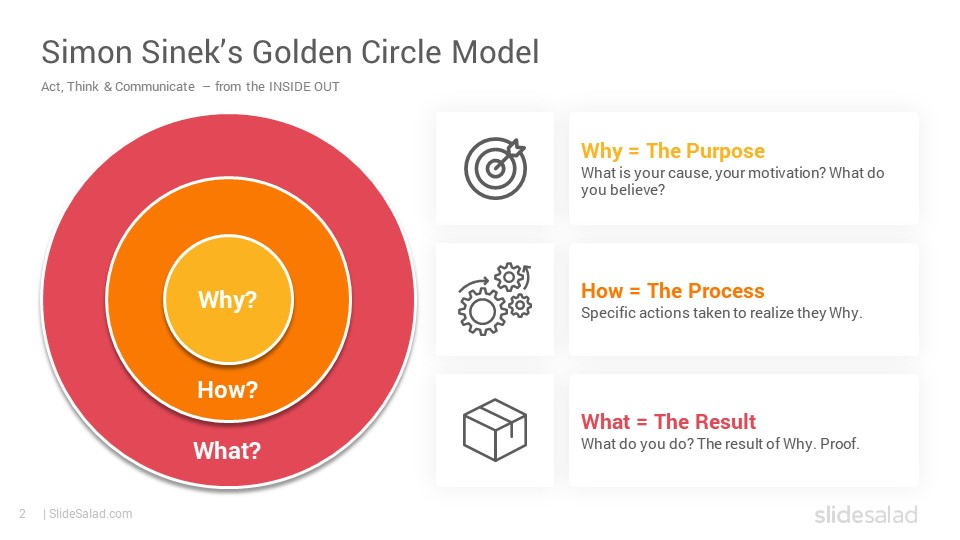

**CHURN:**
 Is an one of the biggest problem facen by SaaS (Software as a service) Based companies like The Orange S.A. Measure of churn is known as Churn rate or Rate of attrition. Proportion of contractual (or subscribed) customers who terminate their contractual relationships/subscriptions with a company in a given timeframe.
#**Types of Churn rate:**


*   User Churn
*   Account Churn

*   Revenue Churn
  
  whatever the types churn, when the rate increaces for a period of time it not fruitfull result. So as a firm, we have to find out the root causes of churn rate and try the best to overcome it. 




In any business or analysis the "why" is  not a afterthought it is a forethought to be carried. The inspiration or a feel a satisfaction can be achieved only after the question process of "why". When we have a reason to work we extract the passion, maximum effort,quality etc not by manipulation but the intention.
How refers to the process in achieving the goal.
What refers to the output that your going to achieve in basis of your why belief.


Application of Golder circle In Dataset


##**Approach to Problem**
  To find the reason for customer churn, first we have to understand our customer. Firm needs to upfront 'why?'. We have to ask lot of  quries to ourself. If we try to answer our own "why?"s, its drives us to our penultimate goal.

##OUR WHY's

**Define your customer?**
Customer is an group or Individual who buys another company's product or service.

**Types of your Customers**


*   Lookers (Visitors or just looking)
*  Buyers( They knoes exactly what they want and they're there to get it)

*   Loyal customers
*   Disatisfied customers





**Why customer chosen you amoung other competitors?**
*   If you want to completly engage your customer, you need to truely
understands their buying descision.

**What they need from you?**
*   Knowing and understanding customer needs is at the centre of every 
successful business.

**Did Customer satisfy with your Product or Service?**

  Do an timely survey within customers and clasify them as:

  **Happy Customer:**
* If customer feels happy. Look over the key features that satisfies our customer need. This gives overall understanding of our product.


  **Unhappy customer** 
*    Survey over unhappy customer provides wealth of information about services and products. People who are unhappy might be more willing to be honest with you about the specific areas in which your products or services aren't meeting their needs.


**CUSTOMER SEGMENTATION:**
  By Segregating them, we can offer taylor-made service to each category. This way wont waste time selling or trying to expand the service of a customer who cannot afford it or selling the wrong service to the wrong set of categories. So, seggregating helps you to pin point your efforts.

  Customer segmentation based on:
*   Geographic
*   Demographic

*   Pshychographic (Consider customer as a person)
*   Behavioral (Measure of action and thoughts)

**Support**
  Customer service plays a major role in your business. It’s the leading indicator for measuring customer loyalty. Identify your unhappy customers, reduce churn, and increase the revenue. It’s also a key point of differentiation which helps to attract fresh customers in a competitive business environment.
 #Types of customer support:

*   Live chat support
*   Social media support

*   email support
*   Omnichanel (Multichannel support)


Now we got basics idea about our customers, lets take a look of our Dataset.










  

In [ ]:
file_path = '/content/drive/MyDrive/churn/Copy of Telecom Churn.csv'
churn_df = pd.read_csv(file_path)
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


##Tail

---



In [ ]:
churn_df.tail(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


##SHAPE

---



In [ ]:
churn_df.shape

(3333, 20)

##Data Types:
 
 we have to check the data type of each column, to make sure the data stored are of appropriate dtype. For instance, numerical value should not be stored as a 'object'. pd.dtype Function return the dtype of each column.

---




In [ ]:
churn_df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object




# This is formatted as code


Data Types stored are appropriate like categorical value as object,numerical features are in float.

Our target variable is "CHURN" which is a Boolean dtype . 



Next lets analyse the missing data.

#MISSING VALUES

Handling missing values is one of the important task before proceeding for analysis. Lets check whether our data consist of missing values. For this pd.isna( functions returns the series of missing values presents in our data.

In [ ]:
churn_df.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

From above step its clear that our data does not have any missing values. Orange Telecom International has a clear tracking of customer data.

Incase If our data contains any missing values, we can handle in two different ways:

1). Get Rid of those rows, if our number of  missing observations are minimum.

2). Otherwise we have to immute those missing values with corresponding variable mean,median or mode(only for dataset has symmetric distribution). If our data distribution is positively skewed or negatively skewed  then replace it with median.

3) Replace with mean or median to ensure that our data is not biased to dominant class.

In [ ]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

##Data Summary

---




In [ ]:
churn_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


On analysing the maximum value, observation is max > 3 times the std which means that our data contains outliers which affects our value significantly.

##columns

In [ ]:
churn_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

#VARIABLE BREAKDOWN

---



**TARGET**

---

Churn — Whether the customer left or retained (True, False )

**NUMERIC FEATURES:**

---



**ACCOUNT LENGTH** - Number of days the customer has been with the company

**NUMBER OF VOICE MAIL MESSAGES** - Number of Voice Mail Messages which has 46 unique values ranging from 0 to 50

In [ ]:
#NUMBER  OF UNIQUE VALUES:
churn_df['Number vmail messages'].nunique()

46

In [ ]:
#LIST OF UNIQUE VALUES:
churn_df['Number vmail messages'].unique()

array([25, 26,  0, 24, 37, 27, 33, 39, 30, 41, 28, 34, 46, 29, 35, 21, 32,
       42, 36, 22, 23, 43, 31, 38, 40, 48, 18, 17, 45, 16, 20, 14, 19, 51,
       15, 11, 12, 47,  8, 44, 49,  4, 10, 13, 50,  9])

**TOTAL DAY MINUTES** - Total Number of Minutes Spent By Customers in Morning

**TOTAL DAY CALLS** - Total Number of Calls made by Customer in Morning.

**TOTAL DAY CHARGE** - Total Charge to the calls that made by Customers in Morning

**TOTAL EVE MINUTES** - Total Number of Minutes Spent By Customers in Evening

**Total eve calls** - Total Number of Calls made by Customer in Evening.

**TOTAL EVE CHARGE** - Total Charge to the Customers in Eveneing.

**TOTAL NIGHT MINUTES** - Total Number of Minutes Spent By Customers in the Night.

**TOTAL NIGHT CALLS** - Total Number of Calls made by Customer in Night.

**TOTAL NIGHT CHARGE** - Total Charge to the Customers in Night.

**TOTAL INTL MINUTES** - Total Number of Minutes Spent By Customers in the International calls. 

**TOTAL INTL CALLS** - Total number of International calls made by customer.

**TOTAL INTL CHARGE** - Total charge to the customer for International calls.

**CUSTOMER SERVICE CALLS** - Total number of customer service calls made by customer over the period of time. Has 10 unique values ranges from 0 t0 9

In [ ]:
#NUMBER  OF UNIQUE VALUES:
churn_df['Customer service calls'].nunique()

10

In [ ]:
#LIST OF UNIQUE VALUES:
churn_df['Customer service calls'].unique()

array([1, 0, 2, 3, 4, 5, 7, 9, 6, 8])

**CATEGORICAL FEATURES:**

---



**STATE** - column contains 51 states of northen america as two character combination. As 'TN' - Tennesse, 'OH'-Ohio, 'RI'-Rhode Island etc. categorical value

**INTERNATIONAL PLAN** - Has Two Categorical value(YES/NO). Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan.

**VOICE MAIL PLAN** - Has Two Categorical value(YES/NO). Yes Indicate Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan.

## **INTRESTING PART**

---



##**UNIVARIATE ANALYSIS**

---



##  This describes the distribution of that particular variable on how it is  and summarises that data.

# Here we need not consider correlation of different variables.

## **TARGET VARIABLE**

---



In [ ]:
# NUMBER OF CHURNED CUSTOMER
churn_df['Churn'][churn_df['Churn']==bool(True)].count()

483

In [ ]:
# NUMBER OF NON-CHURNED CUSTOMER
churn_df['Churn'][churn_df['Churn']==bool(False)].count()

2850

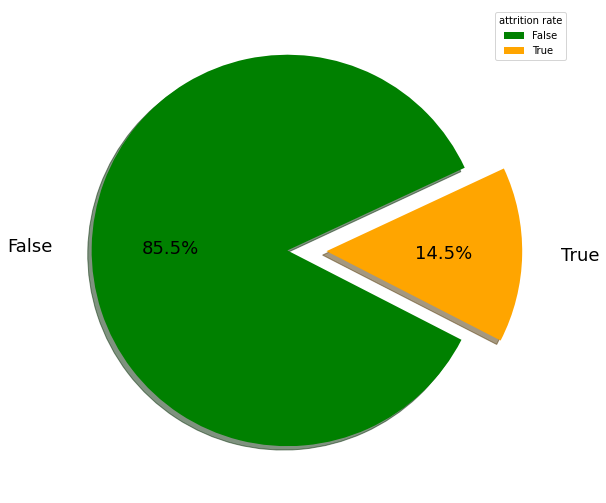

In [ ]:
my_labels = ['False','True']
my_explode = [0.2,0]
my_colors = ['green','orange']
sizes = churn_df['Churn'].value_counts()
fig = plt.figure(1, figsize=(9,9))
plt.pie(sizes,labels = my_labels,explode = my_explode,colors = my_colors,labeldistance = 1.2,autopct='%1.1f%%',startangle = 25,shadow = True,pctdistance = 0.6,textprops={'fontsize': 18} )
plt.legend(title = 'attrition rate')
fig.savefig('churn-pie2.png')
plt.show()


The above pie chart describes the distribution of attrition data of customer as per the given data set. Pie chart clearly explians that the organisation has an attrition rate of 14.5% and retainment of 85.5%.

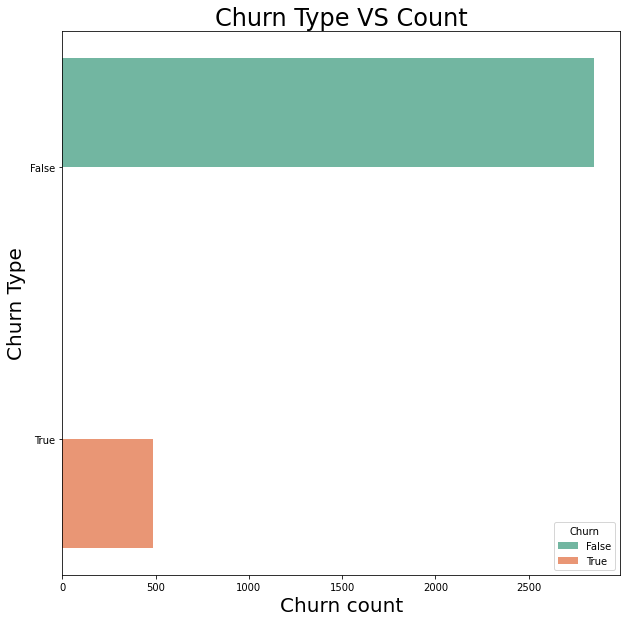

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(y='Churn', hue='Churn', data=churn_df, palette='Set2')
ax.set_xlabel( "Churn count" , size = 20 )
ax.set_ylabel('Churn Type',fontsize=20);
ax.set_title( "Churn Type VS Count" , size = 24 )
fig.savefig('churn-pie.png')

##This chart gives the values rather than the Percentage. So, for the given dataset of 3333 data points, almost 484 data points are churned customers.

## **State**

---



**STATEWISE CHURN GEOMAP:**

In [ ]:
#Creating an DataFrame of only churned customers.
true_churn_df = churn_df[churn_df['Churn']==bool(True)]

In [ ]:
# Grouping of churned customers by state
state_churn_df = true_churn_df.groupby('State',as_index = False).agg({'Churn':'count'}).sort_values(by='Churn',ascending=False)

In [ ]:
# To create a geo map export the data to excel
state_churn_df.to_excel("output.xlsx")  

Text(0.5, 1.0, 'STATE VS CHURN RATE')

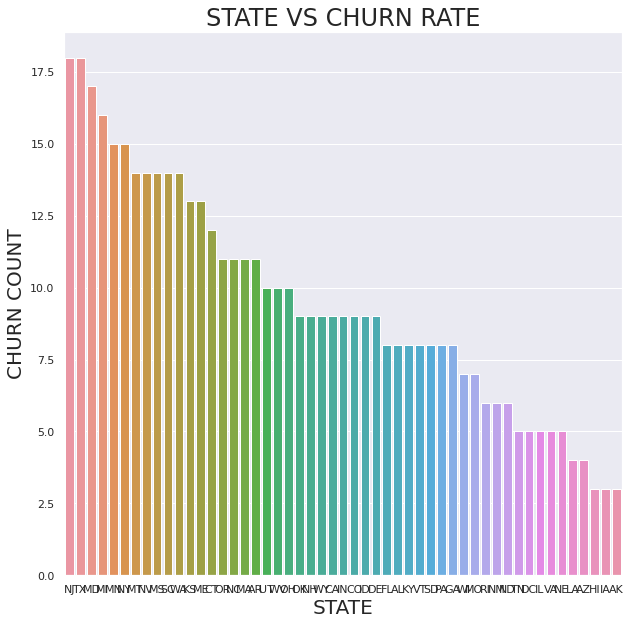

In [ ]:
ax = sns.barplot(x="State", y="Churn", data=state_churn_df)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(20,20)})
ax.set_xlabel( "STATE" , size = 20 )
ax.set_ylabel('CHURN COUNT',fontsize=20);
ax.set_title( "STATE VS CHURN RATE" , size = 24 )

#The above count chart clearly indicates the states that has maximum churt rate. On following analysis we shall analyse why this state has maximum churn rates.

##**Account Length:**



---



In [ ]:
#NUMBER OF CUSTOMER WHOSE ACCOUNT LENGTH LESS THAN 50 DAYS
churn_df.loc[churn_df['Account length']<=50,'Account length'].count()

341

In [ ]:
#NUMBER OF CUSTOMER WHOSE ACCOUNT LENGTH BETWEEN 50 - 150 DAYS
churn_df.loc[churn_df['Account length']<=150,'Account length'].count()-churn_df.loc[churn_df['Account length']<=50,'Account length'].count()

2636

In [ ]:
#NUMBER OF CUSTOMER WHOSE ACCOUNT LENGTH GREATER THAN 150 DAYS
churn_df.loc[churn_df['Account length']>150,'Account length'].count()

356

In [ ]:
# Knowing the  churned customer range
true_churn_df.loc[true_churn_df['Account length']<=150,'Account length'].count()-true_churn_df.loc[true_churn_df['Account length']<=50,'Account length'].count()

385

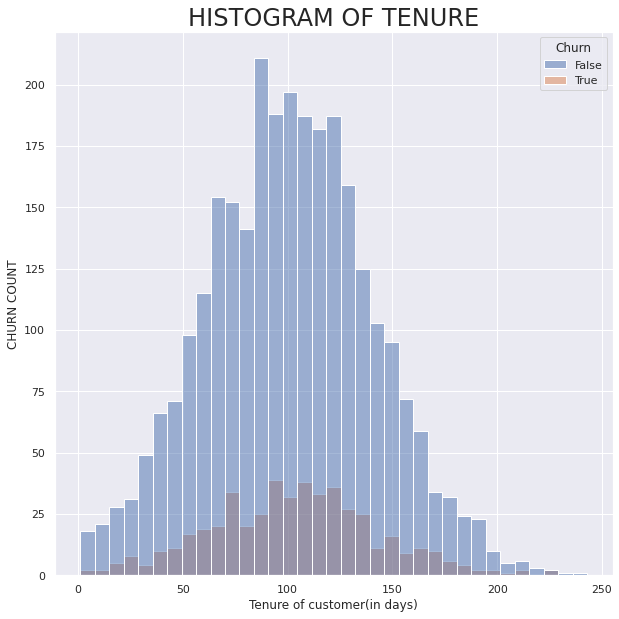

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.histplot(ax=ax,data=churn_df, x="Account length", hue="Churn")
ax.set_xlabel( "Tenure of customer(in days)" , size = 12 )
ax.set_ylabel( "CHURN COUNT" , size = 12 )
ax.set_title( "HISTOGRAM OF TENURE" , size = 24 )
fig.savefig('churn-pie.png')

From the above histogram,  we clearly understand 79% of our customers life span lies between 50 to 150 days.  
and  80% of customers also got chured simultaneously between these time period.

1)It also explain the churned customers are not wrong customers as they have been using the service more than 50 days. 

*   It depicts that the firm did not provide the needful service to the loyal customers or we did not understand their needs keenly.

*   Higher price acquisition might be a reason for churning too.

*   Otherwise It might be due to Unhealthy customer-firm relationshsip.

2). If the firm does not treat their loyal customers fair enough then they might have high probability of churn

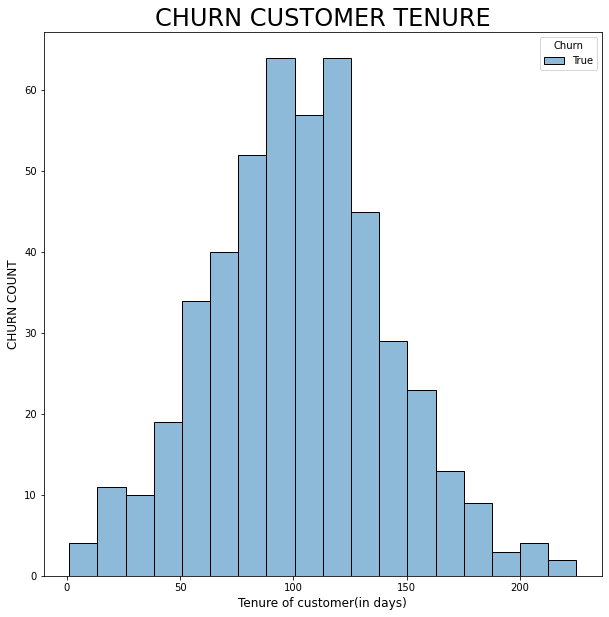

In [ ]:
##Life span for churn Customer
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.histplot(ax=ax,data=churn_df[churn_df['Churn']==True], x="Account length", hue="Churn")
ax.set_xlabel( "Tenure of customer(in days)" , size = 12 )
ax.set_ylabel( "CHURN COUNT" , size = 12 )
ax.set_title( "CHURN CUSTOMER TENURE" , size = 24 )
fig.savefig('churn-life span.png')

##Orange Telecom customers aren’t achieving their desired outcomes from Reliable Customers

## **INTERNATIONAL PLAN**

---



In [ ]:
#NUMBER OF CUSTOMER HAVING SUBCRIPTION FOR INTERNATIONAL PLAN:
churn_df['International plan'][churn_df['International plan']=='Yes'].count()

323

In [ ]:
#NUMBER OF CUSTOMER NOT HAVING SUBCRIPTION FOR INTERNATIONAL PLAN:
churn_df['International plan'][churn_df['International plan']=='No'].count()

3010

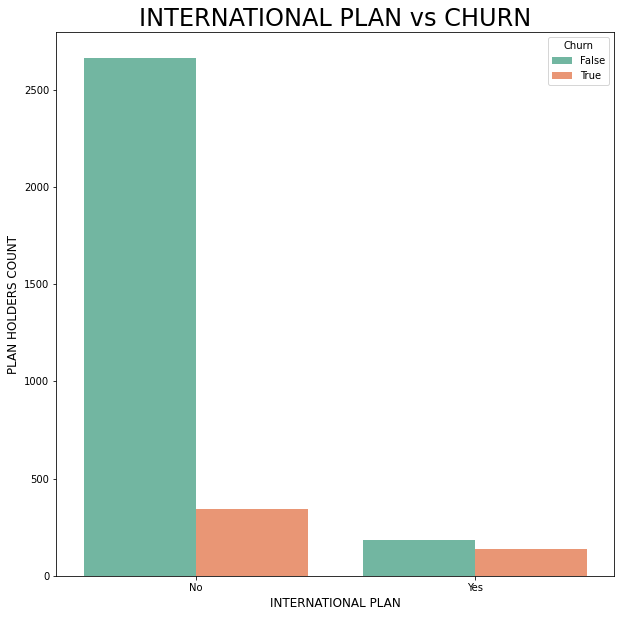

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='International plan', hue='Churn', data=churn_df, palette='Set2')
ax.set_xlabel( "INTERNATIONAL PLAN" , size = 12 )
ax.set_ylabel( "PLAN HOLDERS COUNT" , size = 12 )
ax.set_title( "INTERNATIONAL PLAN vs CHURN" , size = 24 )
fig.savefig('INTERNATIONAL PLAN vs CHURN')

From above plot 9.69% Customers are only having International plan subcription. Remaining 90% Dominant class prefer not to subscribe International plan. So orange telecom has to recounsel their International plan tariff to crab the reason why most of their customers are not taking International plan subscription.

Lets deep dive into international plan using Contingency Table

In [ ]:
pd.crosstab(churn_df['International plan'],
                            churn_df['Churn'], 
                               margins = False).to_excel('cross-tab.xlsx')

##Note that 42.4% of Intl.Plan holders churned compared to those without 11.5% Intl.plan.

##This row percentage contingency table indicates that 28.4% of churners belong to the international plan compared to 6.5% of non-churners.

In [ ]:
#LETS CHECK HOW USAGE OF INTERNATIONAL PLAN AMONG CUSTOMERS
churn_df.groupby('International plan',as_index=False).agg({'Total intl calls':'sum'}).set_index('International plan').to_excel('out-put.xlsx')

##VOICE MAIL PLAN

---



In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
#NUMBER OF CUSTOMER HAVING SUBCRIPTION FOR VOICE MAIL PLAN:
churn_df['Voice mail plan'][churn_df['Voice mail plan']=='Yes'].count()

922

In [ ]:
#NUMBER OF CUSTOMER NOT HAVING SUBCRIPTION FOR VOICE MAIL PLAN:
churn_df['Voice mail plan'][churn_df['Voice mail plan']=='No'].count()

2411

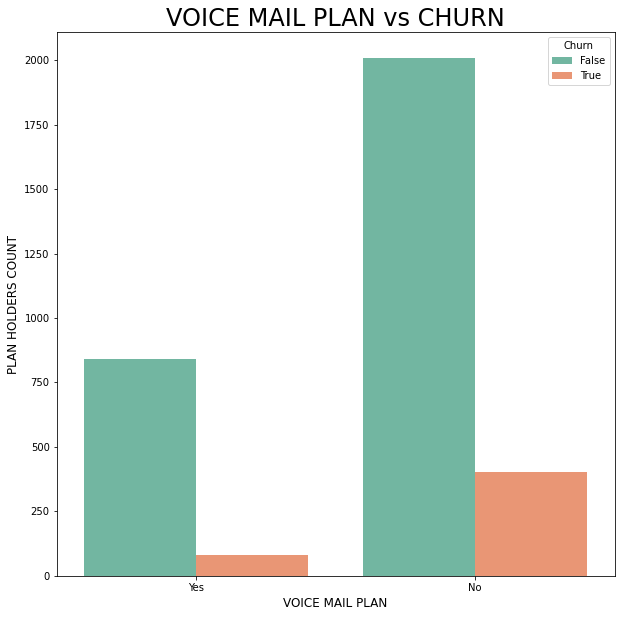

In [ ]:
fig,ax = plt.subplots(figsize = ( 10 , 10 ))
sns.countplot(x='Voice mail plan', hue='Churn', data=churn_df, palette='Set2')
ax.set_xlabel( "VOICE MAIL PLAN" , size = 12 )
ax.set_ylabel( "PLAN HOLDERS COUNT" , size = 12 )
ax.set_title( "VOICE MAIL PLAN vs CHURN" , size = 24 )
fig.savefig('VOICE MAIL PLAN vs CHURN')

In [ ]:
pd.crosstab(churn_df['Voice mail plan'],
                            churn_df['Churn'], 
                               margins = False).to_excel('outt-put.xlsx')

##Note that 83.43% of voice mail Plan holders churned compared to those without 16.56% voice mail plan.

##This row percentage contingency table indicates that 16.71% of churners belong to the voice mail plan compared to 8.67% of non-churners.

In [ ]:
#LETS CHECK HOW USAGE OF VOICE PLAN AMONG CUSTOMERS
churn_df.groupby('Voice mail plan',as_index=False).agg({'Number vmail messages':'sum'}).set_index('Voice mail plan').to_excel('out-put4.xlsx')

**OUTLIERS**:

In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
churn_df['Churn'].unique()

array([False,  True])

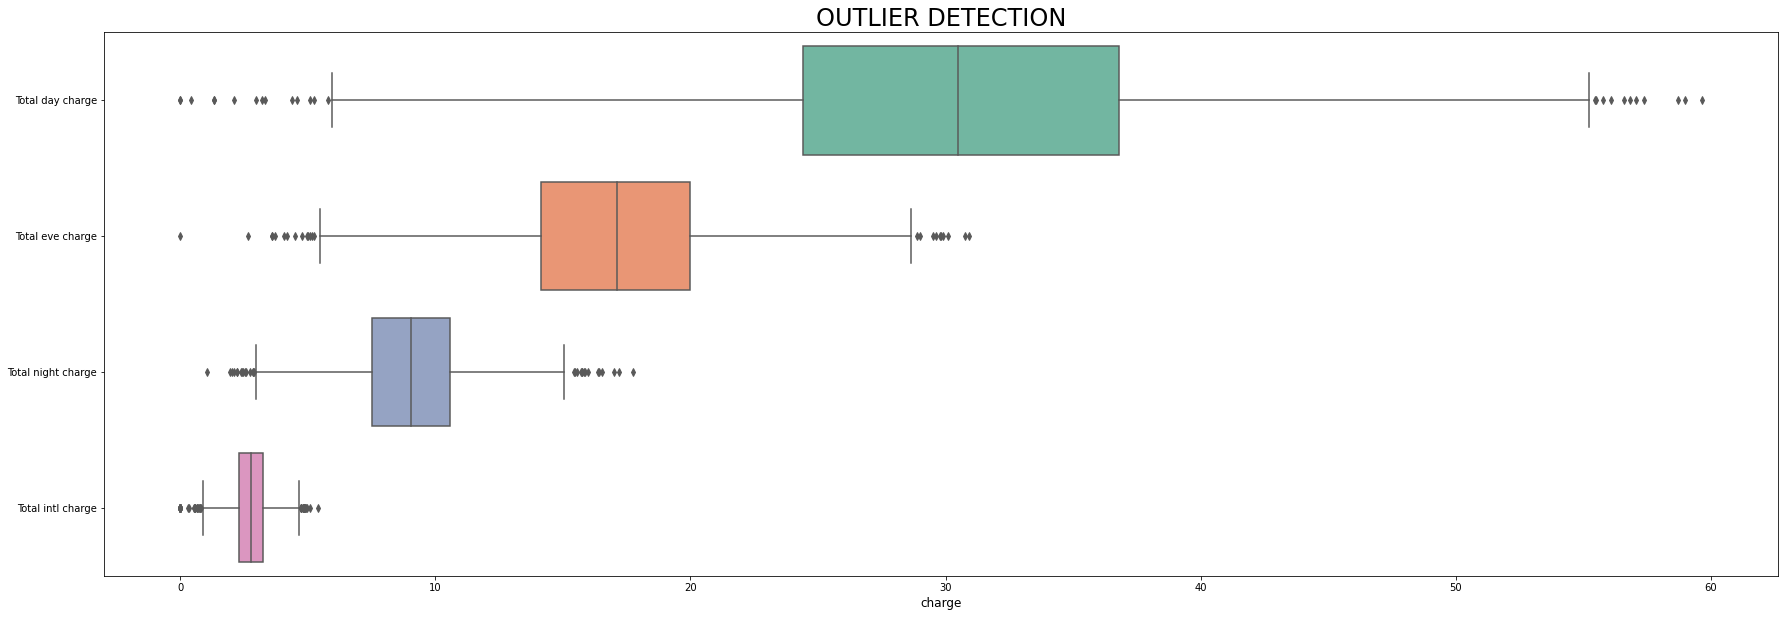

In [ ]:
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.boxplot(data=churn_df[['Total day charge','Total eve charge','Total night charge','Total intl charge']], orient="h", palette="Set2")
ax.set_title( "OUTLIER DETECTION" , size = 24 )
ax.set_xlabel( "charge" , size = 12 )
fig.savefig('OUTLIER DETECTION')

In [ ]:
quartile_q1 = np.percentile(churn_df['Total day charge'],25)

quartile_q2 = np.percentile(churn_df['Total day charge'],50)

quartile_q3 = np.percentile(churn_df['Total day charge'],75)

quartile_q4 = np.percentile(churn_df['Total day charge'],100)

#Calculate IQR
iqr =  quartile_q3 - quartile_q1

# Calculate lower limit
lower_limit = quartile_q1 - (1.5 * iqr)

# Calculate upper limit
upper_limit = quartile_q3 + (1.5 * iqr)

#Find Median Value
np.median(churn_df['Total day charge'])

#Replace outliers with median value
churn_df['Total day charge'][(churn_df['Total day charge']>= upper_limit)] = np.median(churn_df['Total day charge'])
churn_df['Total day charge'][(churn_df['Total day charge']<= lower_limit)] = np.median(churn_df['Total day charge'])

##Total day charge	

---

Since Total day calls, Total Day Minutes are Directly Propotional To Total Day charge, we can summarise the Total day charge and hypothesis our claim.

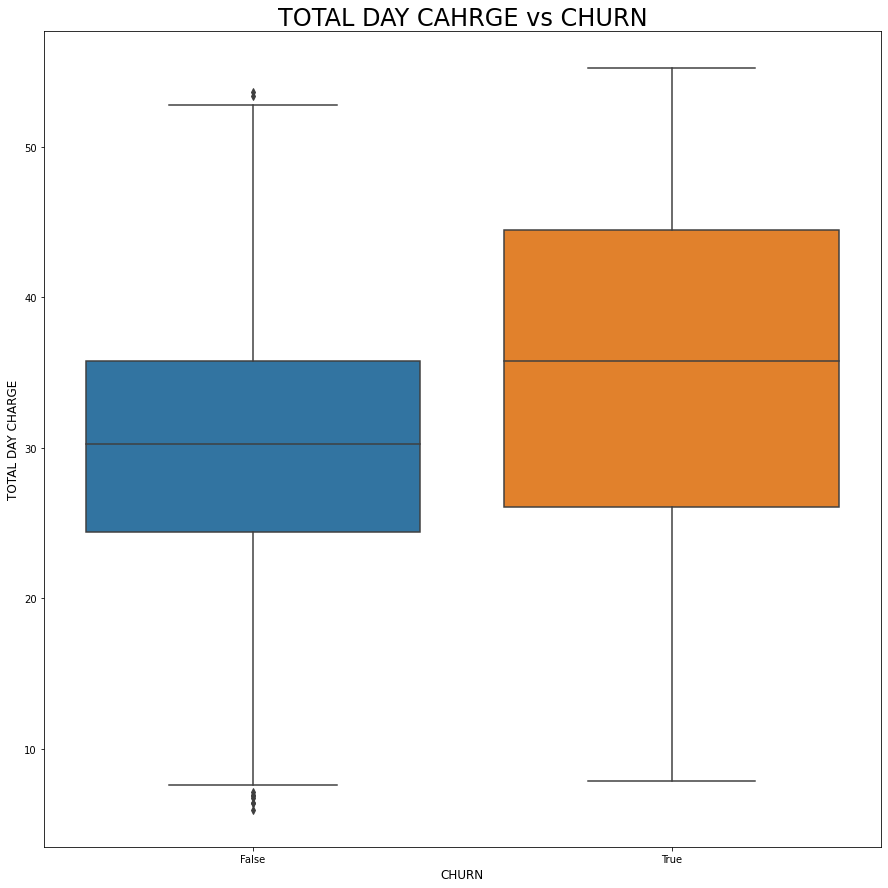

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Churn", y="Total day charge", data=churn_df)
ax.set_title( "TOTAL DAY CAHRGE vs CHURN" , size = 24 )
ax.set_xlabel( "CHURN" , size = 12 )
ax.set_ylabel( "TOTAL DAY CHARGE" , size = 12 )
fig.savefig('TOTAL DAY CHARGE')


from the BoX Plot, it clearly explains the maximum charge of non-churn customers is approximately equals to median charge of churned customers. 

Lets check the Evening, Night and International charges, if the same scenerio reflects then we could conclude High charge acquisition a is primal factor for churn rate

**TOTAL EVE CHARGE:**

In [ ]:
quartile_q1 = np.percentile(churn_df['Total eve charge'],25)

quartile_q2 = np.percentile(churn_df['Total eve charge'],50)

quartile_q3 = np.percentile(churn_df['Total eve charge'],75)

quartile_q4 = np.percentile(churn_df['Total eve charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

churn_df['Total eve charge'][(churn_df['Total eve charge']>= upper_limit)] = np.median(churn_df['Total eve charge'])
churn_df['Total eve charge'][(churn_df['Total eve charge']<= lower_limit)] = np.median(churn_df['Total eve charge'])


##Total Evening charge

---



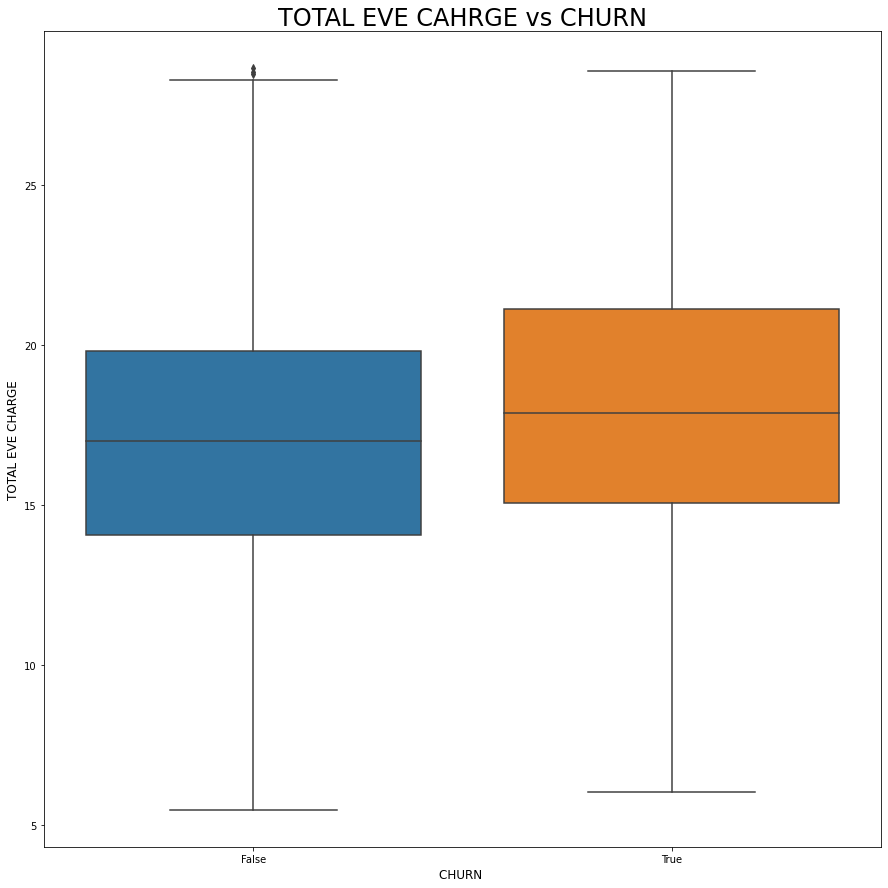

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Churn", y="Total eve charge", data=churn_df)
ax.set_title( "TOTAL EVE CAHRGE vs CHURN" , size = 24 )
ax.set_xlabel( "CHURN ", size = 12 )
ax.set_ylabel( "TOTAL EVE CHARGE" , size = 12 )
fig.savefig('TOTAL EVE CHARGE')


**TOTAL NIGHT CHARGE:**

In [ ]:
quartile_q1 = np.percentile(churn_df['Total night charge'],25)

quartile_q2 = np.percentile(churn_df['Total night charge'],50)

quartile_q3 = np.percentile(churn_df['Total night charge'],75)

quartile_q4 = np.percentile(churn_df['Total night charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

churn_df['Total night charge'][(churn_df['Total night charge']>= upper_limit)] = np.median(churn_df['Total night charge'])
churn_df['Total night charge'][(churn_df['Total night charge']<= lower_limit)] = np.median(churn_df['Total night charge'])


##Total Night charge

---



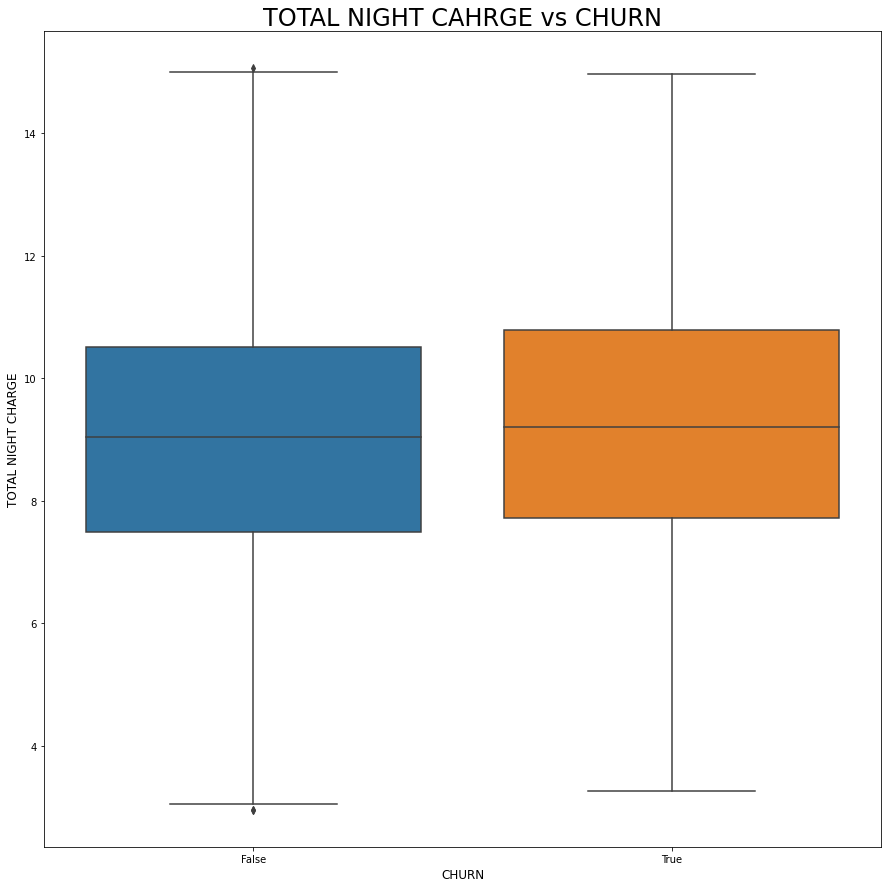

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Churn", y="Total night charge", data=churn_df)
ax.set_title( "TOTAL NIGHT CAHRGE vs CHURN" , size = 24 )
ax.set_xlabel( "CHURN" , size = 12 )
ax.set_ylabel( "TOTAL NIGHT CHARGE" , size = 12 )
fig.savefig('TOTAL NIGHT CHARGE')

**TOTAL INTERNATIONAL CHARGE:**

In [ ]:
quartile_q1 = np.percentile(churn_df['Total intl charge'],25)

quartile_q2 = np.percentile(churn_df['Total intl charge'],50)

quartile_q3 = np.percentile(churn_df['Total intl charge'],75)

quartile_q4 = np.percentile(churn_df['Total intl charge'],100)

#IQR
iqr =  quartile_q3 - quartile_q1

## Calculate lower limit

lower_limit = quartile_q1 - (1.5 * iqr)
## UPPER LIMIT
upper_limit = quartile_q3 + (1.5 * iqr)

# IMPUTE DATA

churn_df['Total intl charge'][(churn_df['Total intl charge']>= upper_limit)] = np.median(churn_df['Total intl charge'])
churn_df['Total intl charge'][(churn_df['Total intl charge']<= lower_limit)] = np.median(churn_df['Total intl charge'])

##Total International charge

---



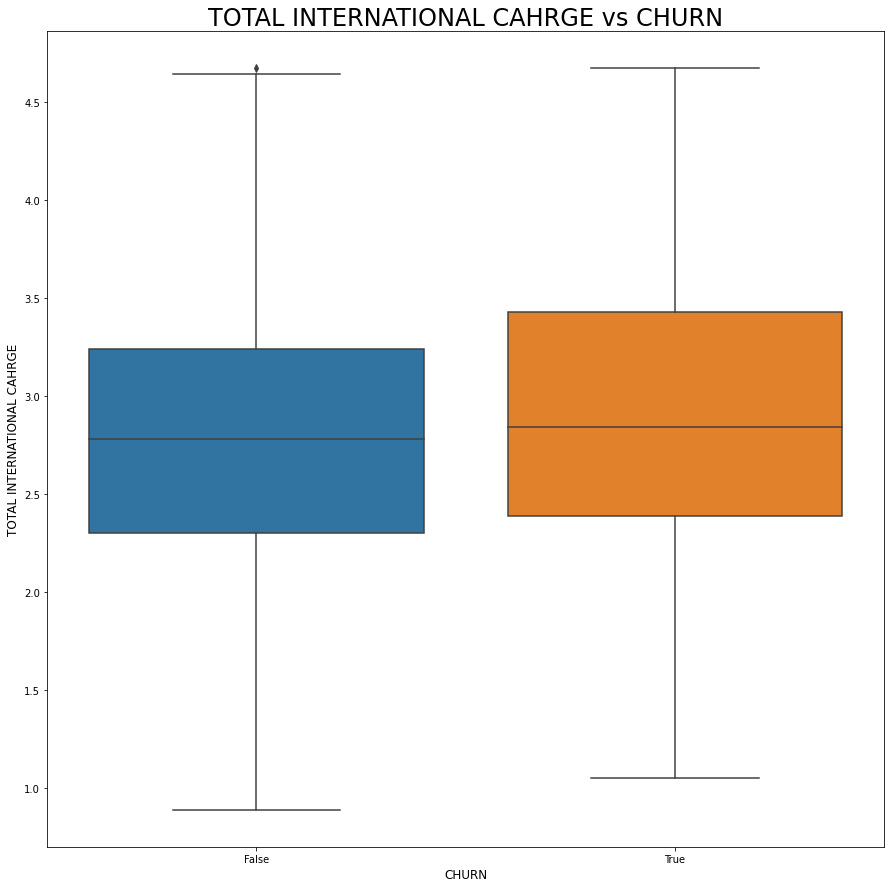

In [ ]:
fig, ax = plt.subplots(figsize = ( 15 , 15 ))
sns.boxplot(x="Churn", y="Total intl charge", data=churn_df)
ax.set_title( "TOTAL INTERNATIONAL CAHRGE vs CHURN" , size = 24 )
ax.set_xlabel( "CHURN" , size = 12 )
ax.set_ylabel( "TOTAL INTERNATIONAL CAHRGE" , size = 12 )
fig.savefig('TOTAL INTERNATIONAL CAHRGE')

These four plots concludes, 
1) Higher the charge higher the churn rate
2) Whether the connectivity providing by orange is not networthy to the cost.

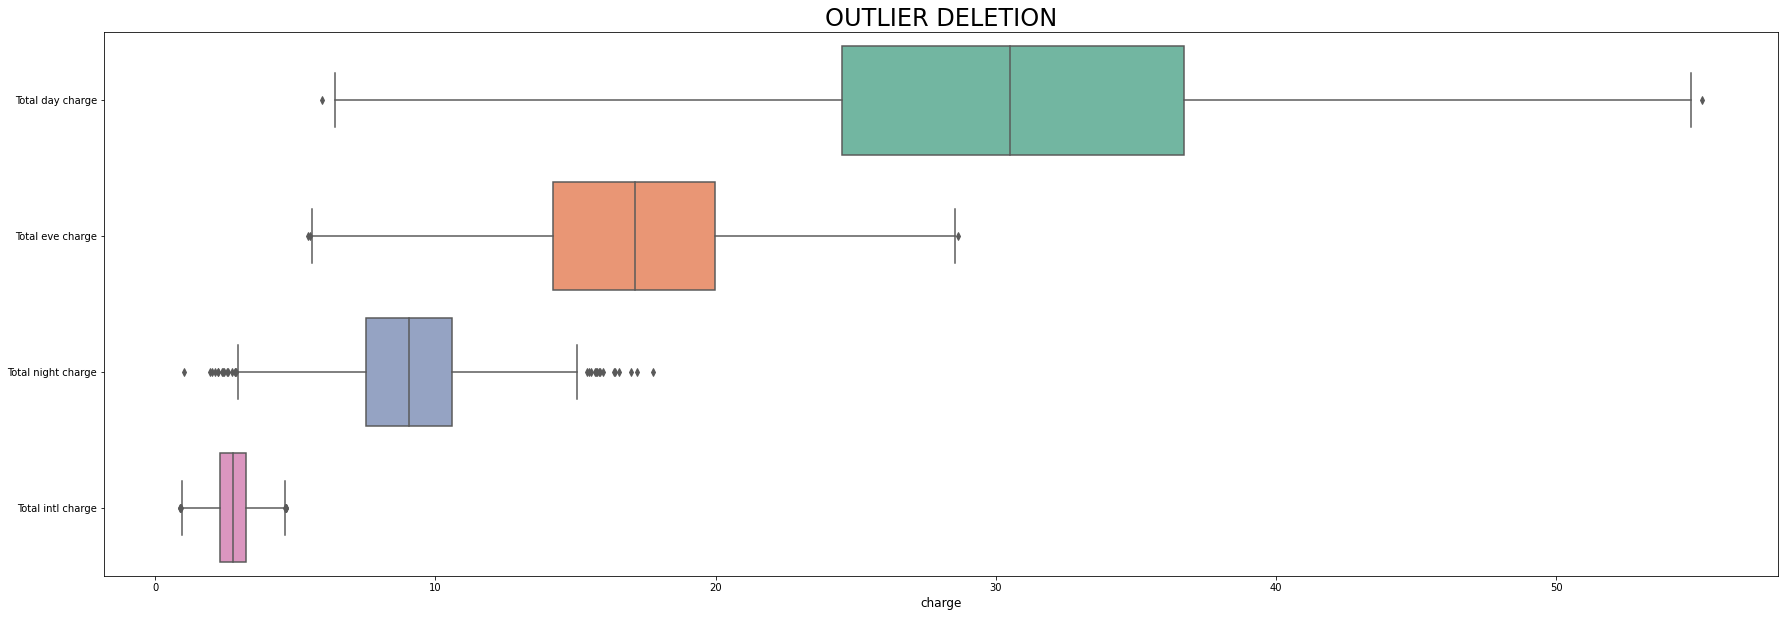

In [ ]:
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.boxplot(data=churn_df[['Total day charge','Total eve charge','Total night charge','Total intl charge']], orient="h", palette="Set2")
ax.set_title( "OUTLIER DELETION" , size = 24 )
ax.set_xlabel( "charge" , size = 12 )
fig.savefig('NO OUTLIERS')

##Bivariant Analysis

---

In this part we are going to check the dependency two or more variable that causes customer churn

##International Plan vs International calls

---



In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
churn_df.groupby('International plan',as_index=False).agg({'Total intl calls':'sum'})

,International plan,Total intl calls
0,No,13441
1,Yes,1489


##almost 90% of international call made by customers whoo are not sbscribe to International plan. And their Respective churn rate too minimal as compared to customers who opted International plan.

#1). orange telecomm have to rensure their marketing strategy of International plan whether the product is selling to correct customer.

#**Calculating Day Charge**

In [ ]:
true_churn_df = churn_df[churn_df['Churn']==True]

In [ ]:
#find charge/min
true_churn_df['total_day_chrg_per_min'] = true_churn_df['Total day charge'] / true_churn_df['Total day minutes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
true_churn_df.groupby('State',as_index=False).agg({'total_day_chrg_per_min':'sum','Churn':'count','Total day calls':'mean'}).sort_values(by='total_day_chrg_per_min',ascending=False)

In [ ]:
false_churn_df = churn_df[churn_df['Churn']==False]

In [ ]:
#find charge/min
false_churn_df['total_day_chrg_per_min'] = false_churn_df['Total day charge'] / false_churn_df['Total day minutes']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
false_churn_df.groupby('State',as_index=False).agg({'total_day_chrg_per_min':'sum','Churn':'count','Total day calls':'mean'}).sort_values(by='total_day_chrg_per_min',ascending=False)

In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
churn_df['total_day_chrg_per_min'] = churn_df['Total day charge'] / churn_df['Total day minutes']

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(churn_df,ax=ax)
plt.tight_layout();

**Charge comparison**

In [ ]:
churn_df['total_day_chrg_per_min'] = churn_df['Total day charge'] / churn_df['Total day minutes']
churn_df['total_eve_chrg_per_min'] = churn_df['Total eve charge'] / churn_df['Total eve minutes']
churn_df['total_night_chrg_per_min'] = churn_df['Total night charge'] / churn_df['Total night minutes']
churn_df['total_international_chrg_per_min'] = churn_df['Total intl charge'] / churn_df['Total intl minutes']

In [ ]:
s = churn_df[['State','total_day_chrg_per_min','total_eve_chrg_per_min','total_night_chrg_per_min','total_international_chrg_per_min']]

In [ ]:
s.groupby('State',as_index=False).agg({'total_day_chrg_per_min':'mean','total_eve_chrg_per_min':'mean','total_night_chrg_per_min':'mean','total_international_chrg_per_min':'mean'})

In [ ]:
s.set_index('State',INPLACE)

In [ ]:
s.set_index('State',inplace=True)

In [ ]:
s = s.sort_values(['total_day_chrg_per_min', 'total_eve_chrg_per_min','total_night_chrg_per_min','total_international_chrg_per_min'], ascending=[False, False,False,False])

In [ ]:
s

,total_day_chrg_per_min,total_eve_chrg_per_min,total_night_chrg_per_min,total_international_chrg_per_min
State,,,,
OH,0.170513,0.085006,0.044987,0.269767
OR,0.170400,0.084996,0.044982,0.270130
SC,0.170256,0.085025,0.045019,0.269620
SC,0.170127,0.085017,0.044995,0.270000
DE,0.170108,0.085000,0.045015,0.269792
...,...,...,...,...
MI,0.169841,0.084985,0.044982,0.270270
WI,0.169620,0.084971,0.045019,0.270248
OK,0.169231,0.085000,0.044994,0.269565


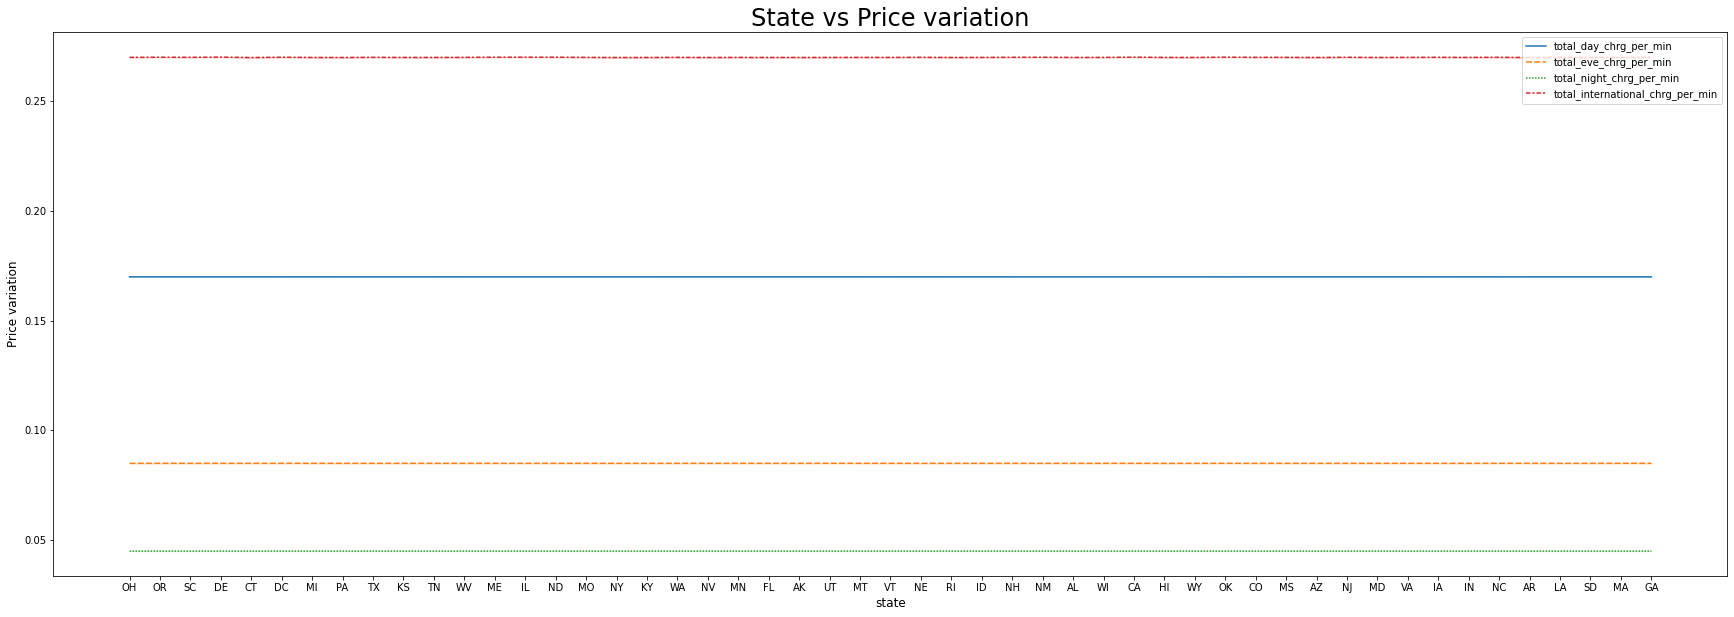

In [ ]:
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.lineplot(data = s)
ax.set_title( "State vs Price variation" , size = 24 )
ax.set_xlabel( "state" , size = 12 )
ax.set_ylabel( "Price variation" , size = 12 )
fig.savefig('price_variation')

In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
state_wise_mean_mins = churn_df.groupby('State',as_index=False).agg({'Total day minutes':'mean','Total eve minutes':'mean','Total night minutes':'mean','Total intl minutes':'mean'}).set_index('State')

In [ ]:
state_wise_mean_mins.head(3)

,Total day minutes,Total eve minutes,Total night minutes,Total intl minutes
State,,,,
AK,178.384615,184.282692,192.326923,10.019231
AL,186.010000,195.462500,187.285000,10.292500
AR,176.116364,201.047273,205.454545,10.372727


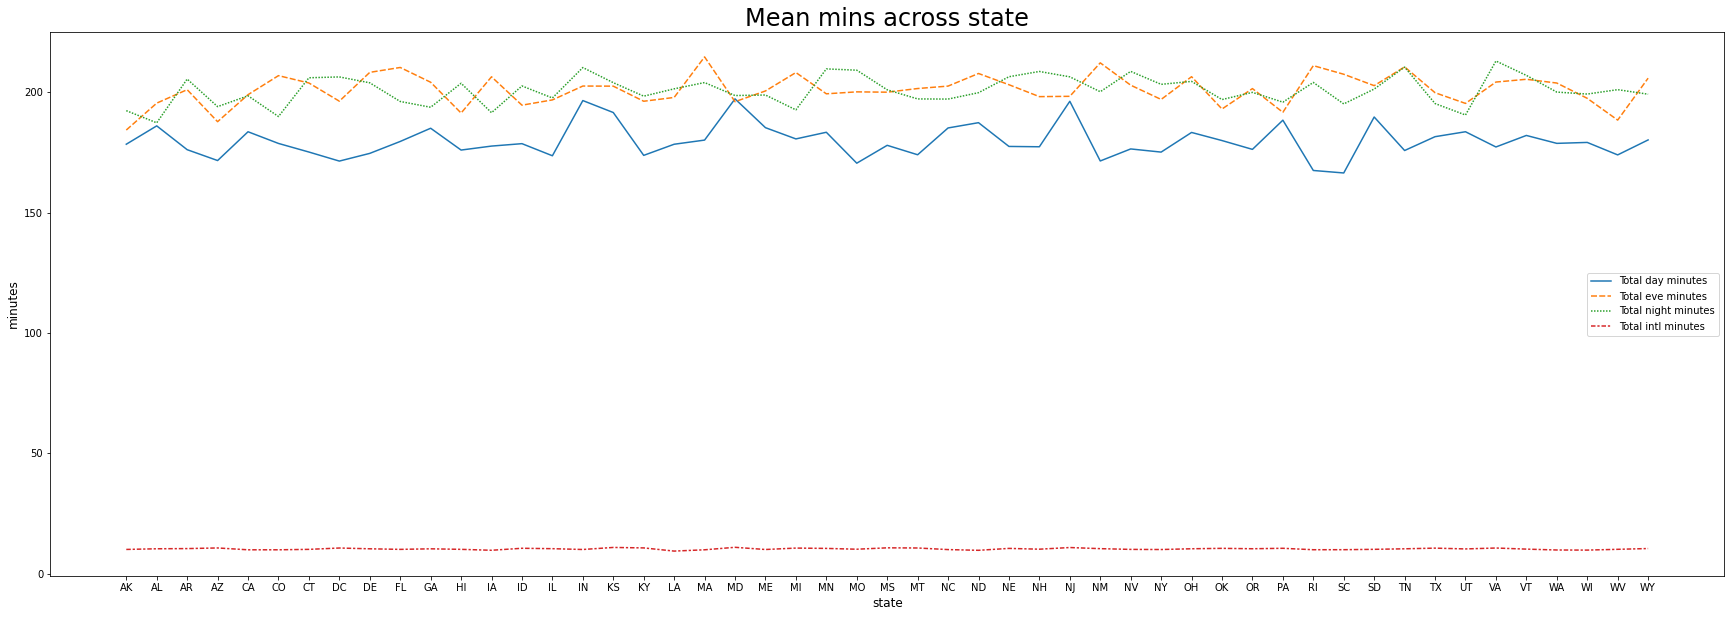

In [ ]:
fig, ax = plt.subplots(figsize = ( 30 , 10 ))
sns.lineplot(data=state_wise_mean_mins)
ax.set_title( "Mean mins across state" , size = 24 )
ax.set_xlabel( "state" , size = 12 )
ax.set_ylabel( "minutes" , size = 12 )
fig.savefig('Mean mins across state')

##HEAT MAP

Heat map explains the correlation of two different variables. correlation ranges between -1 to 1. if value falls within 0 to 1 variable directly correlated to each other.

If 0 to -1 variable Inversly correlated to each other. 

Lets check our data among the variables and their correlation strength..!

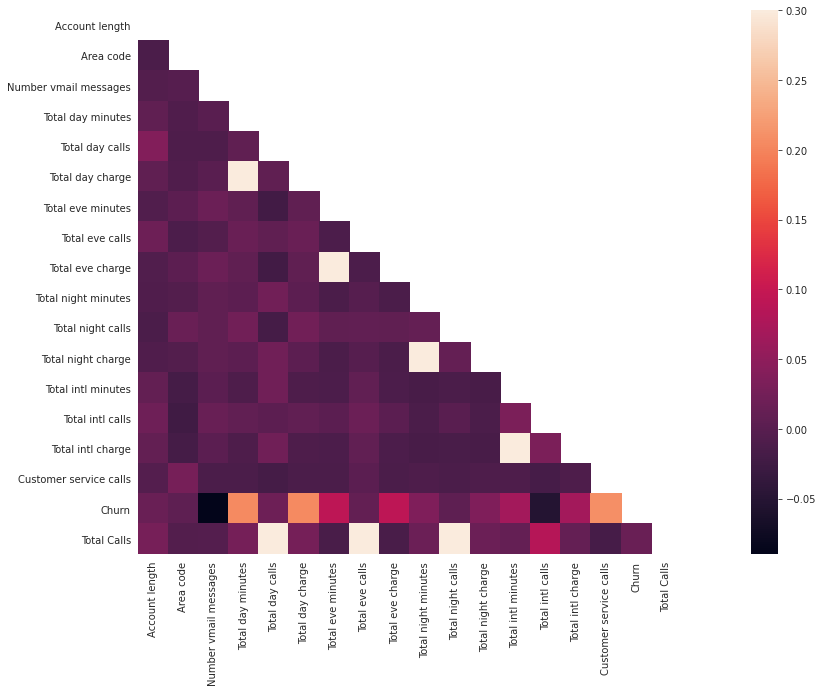

In [ ]:
df_corr = churn_df.corr()
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 10))
    sns.heatmap(df_corr, mask=mask, vmax=.3, square=True)
    f.savefig('heat map')

Our data variables are not much correlated. But churn had positive correlation with customer service calls, Total Day cahrge.

And we can see churn had a week uphill correlation with Total eve charges and total Day charges.

It results orange Telecomm tweeks customers by their higher charge acqisition.

##CHURN vs CUSTOMER SERVICE CALLS

---



In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
churn_df['Total Calls'] = churn_df['Total day calls'] + churn_df['Total eve calls'] + churn_df['Total night calls'] + churn_df['Total intl calls']

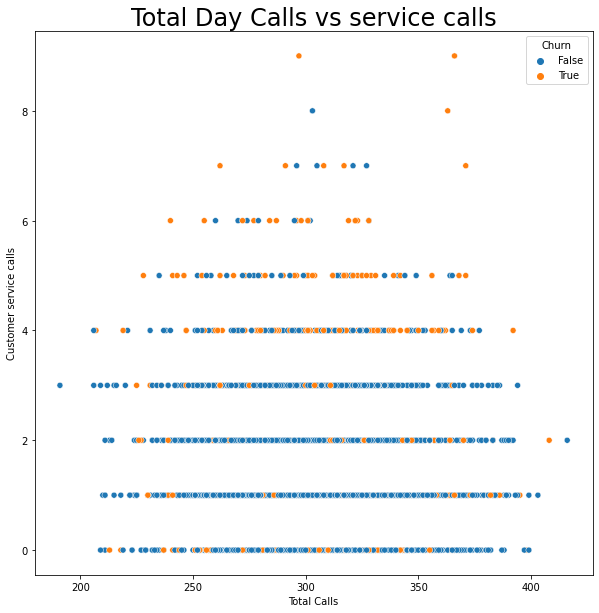

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=churn_df, x="Total Calls", y="Customer service calls", hue='Churn')
ax.set_title( "Total Day Calls vs service calls" , size = 24 )
fig.savefig('CUSTOMER SERVICE CALLS')

##This shows customer who had morethen three service they tend to churn.

1) Eiether even after three calls orange Telecomm not rectify the customer query or customer serivice team not providing service as their best to the customer.

##CHURN vs ACCOUNT LENGTH

---



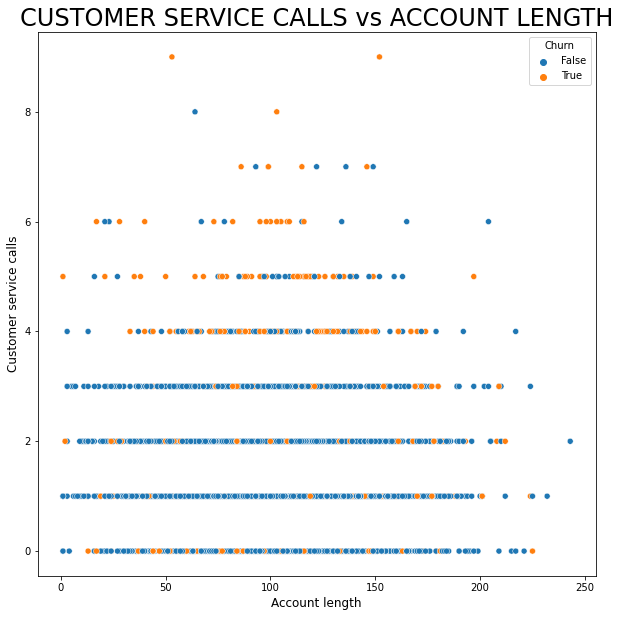

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=churn_df, x="Account length", y="Customer service calls", hue = 'Churn')
ax.set_xlabel( "Account length" , size = 12 )
ax.set_ylabel( "Customer service calls" , size = 12 )
ax.set_title( "CUSTOMER SERVICE CALLS vs ACCOUNT LENGTH" , size = 24 )
fig.savefig('CUSTOMER SERVICE CALLS vs ACCOUNT LENGTH')


In [ ]:
churn_df[churn_df['Churn']==True].groupby('Customer service calls',as_index=False).agg({'Churn':'count'})

,Customer service calls,Churn
0,0,92
1,1,122
2,2,87
3,3,44
4,4,76
5,5,40
6,6,14
7,7,5
8,8,1
9,9,2


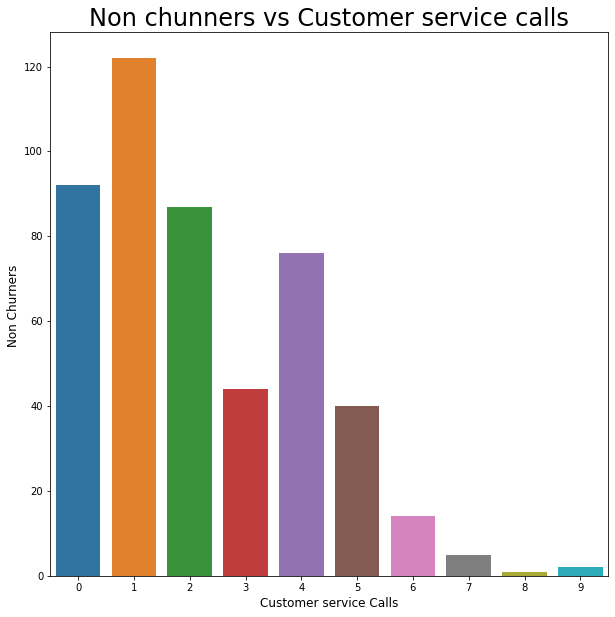

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.barplot(x="Customer service calls", y="Churn", data=churn_df[churn_df['Churn']==True].groupby('Customer service calls',as_index=False).agg({'Churn':'count'}))
ax.set_xlabel( "Customer service Calls" , size = 12 )
ax.set_ylabel( "Non Churners " , size = 12 )
ax.set_title( "Non chunners vs Customer service calls" , size = 24 )
fig.savefig('Non chunners vs Customer service calls')

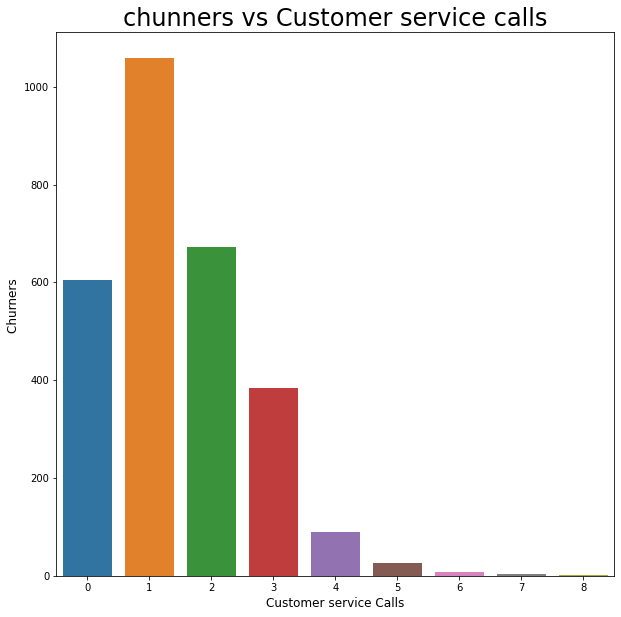

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.barplot(x="Customer service calls", y="Churn", data=churn_df[churn_df['Churn']==False].groupby('Customer service calls',as_index=False).agg({'Churn':'count'}))
ax.set_xlabel( "Customer service Calls" , size = 12 )
ax.set_ylabel( "Churners " , size = 12 )
ax.set_title( "chunners vs Customer service calls" , size = 24 )
fig.savefig('chunners vs Customer service calls')

In [ ]:
churn_df[churn_df['Churn']==False].groupby('Customer service calls',as_index=False).agg({'Churn':'count'})

,Customer service calls,Churn
0,0,605
1,1,1059
2,2,672
3,3,385
4,4,90
5,5,26
6,6,8
7,7,4
8,8,1


##Our scatter plot shows 

## The rate of churn with respect to customer Service calls increases exponentially.
1). whenever the customer complaints not resolve within three service calls or customer who facing sequential issue over a period of time, for them probability of churn rate is high.

##TOTAL DAY MINUTES vs TOTAL EVE MINUTES

---



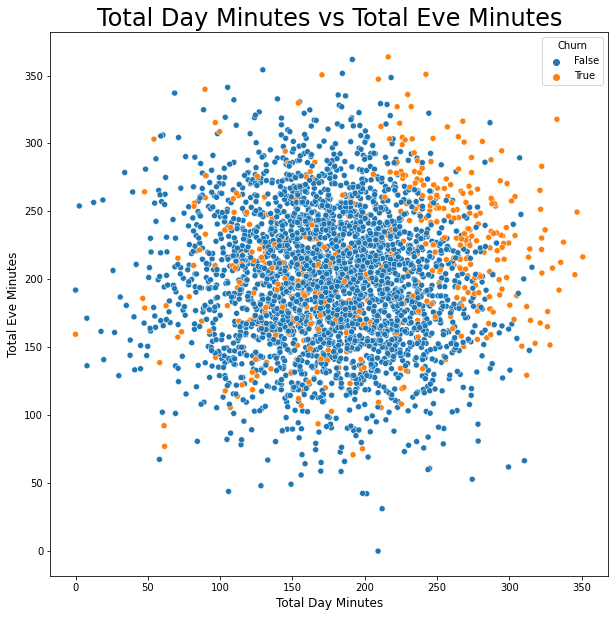

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=churn_df, x="Total day minutes", y="Total eve minutes",hue='Churn')
ax.set_xlabel( "Total Day Minutes" , size = 12 )
ax.set_ylabel( "Total Eve Minutes" , size = 12 )
ax.set_title( "Total Day Minutes vs Total Eve Minutes" , size = 24 )
fig.savefig('Total Day Charge vs Total Eve Charge')

In [ ]:
churn_df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


##TOTAL NIGHT MINUTES vs TOTAL INTERNATIONAL MINUTES

---



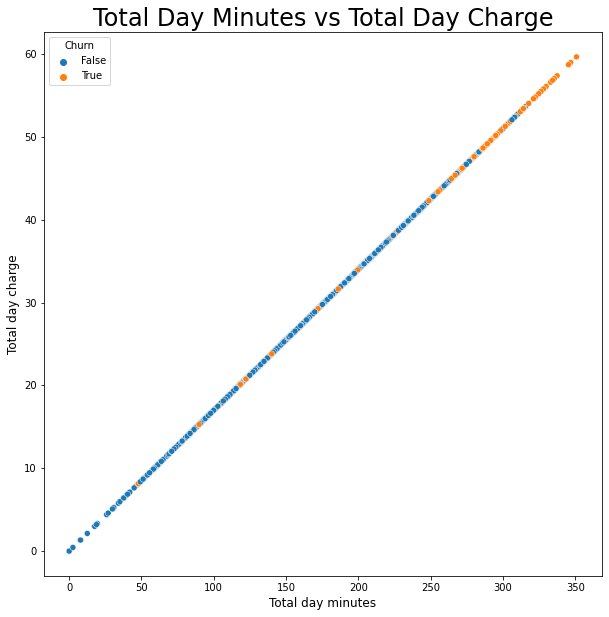

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.scatterplot(data=churn_df, x="Total day minutes", y="Total day charge",hue='Churn')
ax.set_xlabel( "Total day minutes" , size = 12 )
ax.set_ylabel( "Total day charge" , size = 12 )
ax.set_title( "Total Day Minutes vs Total Day Charge" , size = 24 )
fig.savefig('Total Day Charge vs Total day Mins')

## Total day charge and Total eve charge are not perfectly correlated but its individually correlated with churn rate. 

##From above 

**CONCLUSION:**
Through out our analysis we started with basics explanation of different unique variables, Distribute and summarize our individual variable data, then we made an Heat map between the varibles to find out the correlation. Based on the Correlation co-efficient we made an bivariate analysis. From our analysis the prime factor that leads to customer churn are:


*   Geographical area
*   High price charging from premium customers

*   Unsatisfied customer service 

For every factor, we discussed the valid recommendation to fine tune our product that well suited to our customer. 

we have to conduct frequent survey between customers through various modes that will helps our product/company be successfull in market for long haul.

Even, after we tried our best with our product and healthy relation with customer service some customers are tend to Leave. 100% Retention of customer not probabily happen amoung service based companies. So, we have accept those customer churning and try to learn from those type customers who will sign in future.


